# Setting Up
- install font
https://github.com/adobe-fonts/source-han-code-jp/releases/tag/2.000R


# Machine Learning Online Class - Exercise 2: Logistic Regression

##  Instructions

This file contains code that helps you get started on the logistic
regression exercise. You will need to complete the following functions 
in this exericse:

- sigmoid.m
- costFunction.m
- predict.m
- costFunctionReg.m

 For this exercise, you will not need to change any code in this file,
     or any other files other than those mentioned above.

In [37]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams
import pandas as pd
import scipy as py
import numpy as np

# rcParams['font.sans-serif'] =  'Source Han Code JP'
# rcParams['font.weight'] =  'regular'
# rcParams['axes.titlesize'] = 15

# rcParams['ytick.labelsize'] = 12
# rcParams['xtick.labelsize'] = 12



In [14]:
## Load Data
# The first two columns contains the exam scores and the third column
#  contains the label.

df = pd.read_csv("../ex2data1.txt", names=['score1', 'score2', 'admitted'])
df.head()

X = df[["score1","score2"]].head()
y = df["admitted"].head()


# Part 1: Plotting - plotData(X, y)

We start the exercise by first plotting the data to understand the problem we are working with.

xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


/Users/timersinc/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


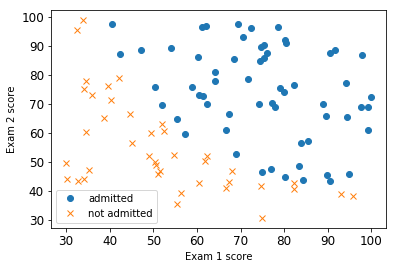

In [38]:
#   We start the exercise by first plotting the data to understand the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

def plot_data(df):
    #  ====================== YOUR CODE HERE ======================
    #  Instructions: Plot the positive and negative examples on a
    #                2D plot, using the option 'k+' for the positive
    #                examples and 'ko' for the negative examples.
    #  Find Indices of Positive and Negative Examples
    df_pos = df[df['admitted'] == 1]
    df_neg = df[df['admitted'] == 0]
    
    plt.plot(df_pos["score1"],df_pos["score2"], "o", label=u'admitted')
    plt.plot(df_neg["score1"],df_neg["score2"], "x", label=u'not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.show()

# call this function
plot_data(df)

In [1]:
# plotData(X, y);

# % Put some labels
# hold on;
# % Labels and Legend
# xlabel('Exam 1 score')
# ylabel('Exam 2 score')

# % Specified in plot order
# legend('Admitted', 'Not admitted')
# hold off;

# fprintf('\nProgram pause

## sigmoid function

\begin{align}
g(x)=\frac{1}{(1+\mathrm{e}^{-x})}
\end{align}


latex command reference : http://www.latex-cmd.com/


% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;


%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

fprintf('\nProgram paused. Press enter to continue.\n');
pause;


%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);

% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

fprintf('\nProgram paused. Press enter to continue.\n');
pause;